Тема урока: регулярные выражения
Подвыражения
Вложенные подвыражения
Ссылки назад
Аннотация. Урок посвящен изучению регулярных выражений.

Подвыражения

Как мы уже знаем, метасимволы повторения (? или * или {2} и т.д) относятся к предыдущему символу или метасимволу.

Регулярному выражению:

&nbsp;{2,}

в тексте:

Привет, меня зовут Тимур&nbsp;Гуев, я – автор курсов по математике и Python. Наши курсы победили в Stepik Awards&nbsp;&nbsp;2021.

ничего не соответствует.

Регулярное выражение &nbsp;{2,} должно было найти два или больше вхождений последовательности символов &nbsp;. Однако оно ничего не нашло. Все потому что диапазон {2,} определяет количество повторений того символа, который непосредственно предшествует ему, в данном случае ему предшествует точка с запятой. Последовательность символов &nbsp;; была бы найдена, в отличие от последовательности &nbsp;&nbsp;

Подвыражения – части большого выражения, которые группируются так, чтобы они обрабатывались как единый объект. Подвыражения заключаются между символами ( и ).

Символы ( и ) являются метасимволами. Если требуется поиск соответствий самим символам ( и ), то в регулярном выражении им должен предшествовать символ обратной косой черты \( и \).

In [1]:
import re
regex = r'(&nbsp;){2,}'

s = "Привет, меня зовут Тимур&nbsp;Гуев, я – автор курсов по математике и Python. Наши курсы победили в Stepik Awards&nbsp;&nbsp;2021."
re.findall(regex, s)

['&nbsp;']

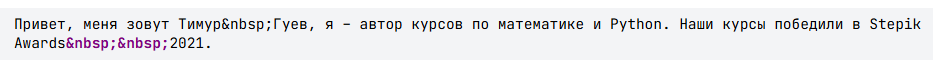

In [2]:
from functions import picture
picture('dfsg.png')

Подвыражение (&nbsp;) обрабатывается как единый объект. Поэтому диапазон {2,}, который следует после него, относится ко всему подвыражению, а не только к точке с запятой.

Рассмотрим еще один пример. Будем использовать регулярное выражение для поиска IP-адресов. Будем считать, что IP-адрес – это четыре числа (одно, двух или трехзначное), разделенные символом точки.

In [3]:
import re
regex = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

s = "Пингую сайт www.stepik.org [13.69.75.239] 32 байтами данных."
re.findall(regex, s)

['13.69.75.239']

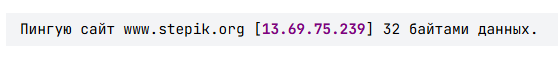

In [4]:
picture('Безвыкн имени.png')

Каждому шаблону \d{1,3} соответствует одно из чисел в IP-адресе. Эти четыре числа разделены точками .. Шаблон \d{1,3}\. повторен три раза и поэтому также может быть записан с помощью повторения. Таким образом, регулярное выражение:

\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}

можно записать с использованием подвыражения в виде:

(\d{1,3}\.){3}\d{1,3}

Регулярное выражение (\d{1,3}\.){3}\d{1,3} не совсем точно описывает IP-адреса, поскольку не учитывает ограничение, ведь IP-адрес состоит из 4 чисел в диапазоне от 0 до 255.

Вложенные подвыражения

Подвыражения могут быть вложенными. Одни подвыражения могут быть вложены в другие подвыражения, которые, в свою очередь, вложены в третьи подвыражения, и т.д.

Возможность вкладывать подвыражения позволяет создавать невероятно мощные регулярные выражения. Чтобы продемонстрировать использование вложенных подвыражений, мы снова рассмотрим пример с IP-адресами.

Вот использованное раннее регулярное выражение:

(\d{1,3}\.){3}\d{1,3}

в котором подвыражение повторено три раза, а за ним в заключении следует число. Синтаксически все правильно. IP-адрес составлен из четырех чисел, каждое из них содержит от одной до трех цифр, причем числа отделены друг от друга точками. Данное регулярное выражение будет соответствовать любому правильному (допустимому) IP-адресу. Но оно будет соответствовать не только правильным IP-адресам.

Как было сказано выше, такое регулярное выражение не совсем точно описывает IP-адреса, поскольку не учитывает ограничение, ведь IP-адрес состоит из 4 чисел в диапазоне от 0 до 255. А наше регулярное выражение допускает также и другие числа, выходящие за пределы требуемого диапазона (например, 345,700,999 и т.д.), которые недопустимы в IP-адресах.

Было бы хорошо, если бы можно было определить диапазон допустимых значений, но регулярные выражения соответствуют символам. Математические вычисления – не их стихия.

В некоторых отдельных случаях можно записать нужное регулярное выражение. Для этого необходимо точно определить все те цепочки, которым оно должно соответствовать, и все те цепочки, которым оно не должно соответствовать. Приведем правила, определяющие правильные комбинации в каждом числе IP-адреса:

любое однозначное или двузначное число
любое трехзначное число, начинающееся с 1
любое трехзначное число, начинающееся с 2, если вторая цифра в диапазоне от 0 до 4
любое трехзначное число, начинающееся с 25, если третья цифра находится в диапазоне от 0 до 5

Если последовательно придерживаться этих правил, становится ясно, что действительно можно написать регулярное выражение, которое может найти все IP-адреса и только их.

Нужное регулярное выражение имеет вид:

(((\d{1,2})|(1\d{2})|(2[0-4]\d)|(25[0-5]))\.){3}((2[0-4]\d)|(25[0-5])|(1\d{2})|(\d{1,2}))

Рассмотрим, как работает это регулярное выражение. Прежде всего отметим, что оно работает потому, что в нем используется ряд вложенных подвыражений. Проанализируем, например, следующее выражение, содержащее 4 подвыражения:

(((\d{1,2})|(1\d{2})|(2[0-4]\d)|(25[0-5]))\.){3}

Подвыражение (\d{1,2}) находит любое число в диапазоне от 0 до 99. Подвыражение (1\d{2}) находит любое трехзначное число, начинающееся с цифры 1 (после 1 следуют любые две цифры), то есть любое число в диапазоне от 100 до 199. Подвыражение (2[0-4]\d) находит все числа от 200 до 249, а подвыражение (25[0-5]) находит числа от 250 до 255. Каждое из этих подвыражений является операндом другого подвыражения, составленного из этих подвыражений с помощью оператора ИЛИ |. Поэтому будет выполняться поиск числа, соответствующего одному из этих подвыражений, а не всем. После диапазона чисел следует \., поэтому будет выполняться поиск точки. Так что полученное подвыражение соответствует всей последовательности цифр и точке (всему числу и точке после него). Это подвыражение заключено в скобки, то есть само рассматривается как часть подвыражения, которое повторяется три раза с помощью {3}. В конце диапазон чисел повторяется снова, но на этот раз после него нет \., этот диапазон как раз и соответствует последнему числу в IP-адресе.

Именно благодаря тому, что каждое из четырех чисел находится в диапазоне от 0 до 255, это регулярное выражение действительно находит все правильные IP-адреса и отвергает все ошибочные.

Примечания

Примечание 1. Записать регулярное выражение, которое соответствует тому, что мы хотим найти, не составляет большого труда. Намного сложнее написать регулярное выражение, которое учитывает все возможные сценарии так, чтобы это выражение не соответствовало тому, с чем мы не хотим установить соответствие.

Примечание 2. Подвыражения используются для группировки частей регулярного выражения, они заключаются в круглые скобки ( и ). Обычно подвыражения используются для того, чтобы точно указать, к каким частям регулярного выражения относятся метасимволы повторения, и правильно определяют операнды операторов ИЛИ (|). При необходимости подвыражения могут быть вложены.

Примечание 3. Регулярные выражения могут выглядеть весьма запутанно. Ключ к пониманию их состоит в том, чтобы найти их подвыражения, а затем проанализировать и понять каждое из подвыражений по отдельности. Начинать надо с самых внутренних частей и продвигаться наружу, то есть к более сложным выражениям, состоящим из уже разобранных подвыражений. Ни в коем случае не нужно пробовать читать символ за символом с самого начала. Каким бы сложным ни было регулярное выражение, при рекомендуемом подходе оно окажется намного проще, чем показалось на первый взгляд.

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют Американские почтовые индексы, удовлетворяющие следующим условиям:

почтовый индекс начинается с пяти цифр
далее следует необязательная часть из четырех цифр, которая отделяется от пяти первых цифр дефисом

In [46]:
import re
regex = r'\d{5}(-\d{4})?'

s = "My old poscode: 18491\
And new: 48034-1234"
# re.findall(regex, s)
matches = re.finditer(regex, s)

for match in matches:
    print(match.group())

18491
48034-1234


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют Североамериканские номера телефонов, удовлетворяющие одновременно всем следующим условиям:

номер телефона начинается из трехцифрового кода города, который может заключаться в круглые скобки
далее через пробел или дефис следует номер с семью цифрами, разделенный на трехцифровой префикс и четырехцифровой номер линии, между которыми указывается дефис
В номере телефона могут использоваться любые цифры за двумя исключениями: первая цифра кода города и первая цифра префикса не могут быть 0 или 1.

In [71]:
import re
regex = r'(\([^01]\d{2}\)|[^01]\d{2})[- ][^01]\d{2}-\d{4}'

s = "Glados: 248-555-1234"
s = "Peter: (313) 555-1234"
s = "(011)-377-4567"
s = "(222)-190-0000"
s = "(333-555-1234"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

333-555-1234


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов, удовлетворяющие одновременно всем следующим условиям:

последовательность должна состоять только из bee и geek
последовательность должна содержать хотя бы один geek
bee не может находиться рядом с самим собой (не может быть beebee)
geek может появиться только после того, как до этого было записано bee
после каждого bee когда-нибудь должен появиться geek

In [109]:
import re
regex = r"beegeekgeekbeegeekgeekbeegeekgeek|(\bbee(geek)+(beegeek)*|bee(geek)+)"
regex = r'((bee){1}(geek){1,})+'
regex = r'(bee(geek)+)+'

s = "Correct name is beegeekbeegeek"
# s = "hello beegeek_cyber_school"
# s = "beebeegeekgeekgeekbee"
# s = "beegeekgeekbeegeekgeekbeegeekgeek"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

beegeekbeegeek


Ссылки назад

Предположим, что в тексте нужно найти все подряд повторяющиеся слова, то есть опечатки, где то же самое слово было по ошибке напечатано дважды. Очевидно, что при поиске второго вхождения слова должно быть известно предыдущее слово. Ссылки назад позволяют в регулярном выражении обратиться к предыдущим совпадениям (в данном случае к ранее найденному слову).

In [110]:
import re
regex = r'(\b\w+\b)[ ]+\1'

s = "Это текст, в котором котором несколько слов    слов повторяются, хотя они и не   не должны повторяться повторяться."
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

котором котором
слов    слов
не   не
повторяться повторяться


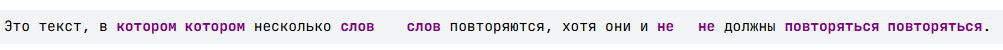

In [111]:
picture('Без имарнени.png')

Подвыражение (\bw+\b) соответствует словам, состоящим из одного или нескольких алфавитно-цифровых символов, а выражение [ ]+ соответствует любому количеству пробелов в конце этих слов. Подвыражение (\bw+\b) используется для того, чтобы сгруппировать символы в одно выражение, пометить его и идентифицировать для использования в дальнейшем.

Заключительная часть этого регулярного выражения (\1) — это и есть ссылка назад на подвыражение, и всякий раз, когда подвыражению (\b\w+\b) соответствует слово, точно такому же слову соответствует и \1. Например, когда (\b\w+\b) соответствует слову котором, \1 также соответствует слову котором.

Термин "ссылка назад" обозначает объект, который ссылается на одно из предыдущих подвыражений. Выражение \1 соответствует первому подвыражению, \2 — второму, \3 — третьему и так далее.

Рассмотрим еще один пример, который демонстрирует необходимость в ссылках назад. В HTML-документах заголовочные теги (от <H1> до <H6> вместе с закрывающими тегами) позволяют определить и отформатировать тексты заголовков на WEB-страницах. Пусть нам требуется определить местонахождение всех текстов заголовков, независимо от уровня заголовка.

Регулярное выражение:

<[Hh]1>.*</[Hh]1>

соответствует первому заголовку от <H1> до </H1> и соответственно от <h1> до </h1> (HTML-теги не зависят от регистра). Для того чтобы найти все заголовки, мы можем попробовать использовать следующее регулярное выражение:

<[Hh][1-6]>.*?</[Hh][1-6]>

In [199]:
import re
regex = r'<[Hh][1-6]>.*</[Hh][1-6]>'

s = '''<BODY>
<H1>Добро пожаловать на курсы BEEGEEK</H1>
Мы считаем, что настоящий программист должен понимать, как работает компьютер, обладать аналитическим мышлением и не бояться математики.
Следующие курсы:
<H2>ООП</H2>
<h2>Алгоритмы и структуры данных</h2>
Оставайтесь с нами!
</BODY>'''
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

<H1>Добро пожаловать на курсы BEEGEEK</H1>
<H2>ООП</H2>
<h2>Алгоритмы и структуры данных</h2>


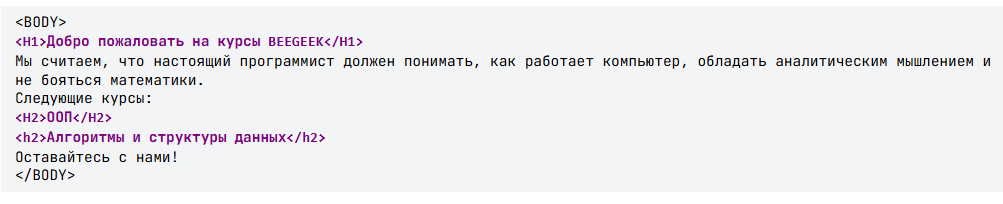

In [129]:
picture('Без имевани.png')

Выражение <[Hh][1-6]> соответствует любому тегу, открывающему заголовок (<H1>, <H2>, <h2> и т.д.), а выражение </[Hh][1-6]> соответствует любому тегу, закрывающему заголовок.

Такое регулярное выражение почти работает. Проблема заключается в том, что закрывающие теги не обязательно соответствуют открывающим.

In [128]:
import re
regex = r'<[Hh][1-6]>.*?</[Hh][1-6]>'

s = "<BODY>\
<H1>Добро пожаловать на курсы BEEGEEK</H1>\
Мы считаем, что настоящий программист должен понимать, как работает компьютер, обладать аналитическим мышлением и не бояться математики.\
Следующие курсы:\
<H2>ООП</H2>\
<h2>Алгоритмы и структуры данных</h3>\
Оставайтесь с нами!\
</BODY>"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

<H1>Добро пожаловать на курсы BEEGEEK</H1>
<H2>ООП</H2>
<h2>Алгоритмы и структуры данных</h3>


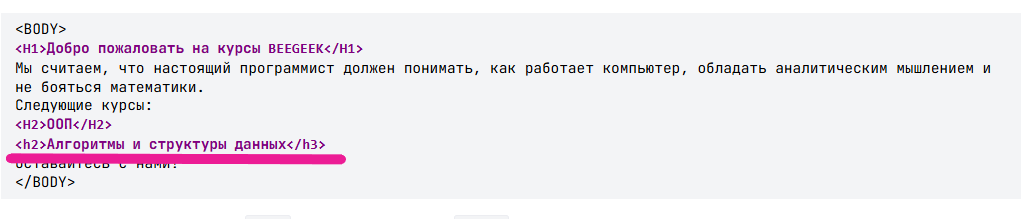

In [131]:
picture('Без именlkjи.png')

Тег заголовка, начинающийся с <h2> и заканчивающийся </h3>, недопустим, и все же регулярное выражение нашло его.

Проблема состоит в том, что вторая часть совпадения (часть соответствующая закрывающему тегу) не имеет никакой информации о первой части совпадения (части соответствующей открывающему тегу). И именно здесь ссылки назад становятся очень полезными.

In [197]:
import re
regex = r'<[Hh]([1-6])>.*</[Hh]\1>'

s = "<BODY>\
<H1>Добро пожаловать на курсы BEEGEEK</H1>\
Мы считаем, что настоящий программист должен понимать, как работает компьютер, обладать аналитическим мышлением и не бояться математики.\
Следующие курсы:\
<H2>ООП</H2>\
<h2>Алгоритмы и структуры данных</h3>\
Оставайтесь с нами!\
</BODY>"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

<H1>Добро пожаловать на курсы BEEGEEK</H1>
<H2>ООП</H2>


Ссылки назад будут работать только в том случае, если выражение, на которое они ссылаются, является подвыражением (заключено в скобки).

Примечания

Примечание 1. Подвыражения нумеруются слева направо по открывающим их скобкам, включая вложенные подвыражения. У первого подвыражения номер 1, у второго – номер 2. У выражения в целом – 0.

Например, для входной строки foobar регулярное выражение (foo(bar)) найдет:

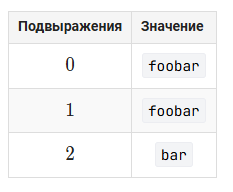

In [133]:
picture('Без имеванрни.png')

In [134]:
import re

# Регулярное выражение с подвыражениями
regex = r'(foo(bar))'

# Строка для поиска
s = 'foobar'

# Используем re.search для поиска первого совпадения
match = re.search(regex, s)

if match:
    # Подвыражение 1 захватывает 'foobar' (все из 'foo' и 'bar')
    print("Подвыражение 1:", match.group(1))  # Это даст 'foobar'
    # Подвыражение 2 захватывает только 'bar'
    print("Подвыражение 2:", match.group(2))  # Это даст 'bar'
else:
    print("Совпадений не найдено.")


Подвыражение 1: foobar
Подвыражение 2: bar


Примечание 2. На подвыражения ссылаются по их относительным позициям: \1 служит для ссылки на первое подвыражение, \7 – для ссылки на седьмое подвыражение и т.д. Этот синтаксис имеет один серьезный недостаток: перемещение и редактирование подвыражений (и таким образом изменение порядка подвыражений) может нарушить регулярное выражение, а добавление или удаление подвыражений может быть даже еще более проблематичным.

Чтобы избавиться от этого недостатка, в некоторых более новых реализациях регулярных выражений (в частности в Python) поддерживается захват по имени – возможность, благодаря которой каждому подвыражению можно дать уникальное название (имя), впоследствии имя может использоваться для того чтобы обратиться к подвыражению (по этому имени, а не по его относительной позиции).

В языке Python именованные подвыражения создаются с помощью синтаксиса (?P<name><regex>). При этом обращаться по имени к такому подвыражению можно так \g<name>. Об этом будет подробно рассказано в следующих уроках.

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов длины 6, удовлетворяющие одновременно всем следующим условиям:

первый символ — строчная латинская буква
второй символ — цифра, любая буква в произвольном регистре или символ нижнего подчеркивания
третий символ — заглавная латинская буква
четвертый символ должен совпадать с первым символом
пятый символ должен совпадать со вторым символом
шестой символ должен совпадать с третьим символом

In [136]:
import re
regex = r'\b([a-z])([\dA-Za-z_])([A-Z])\1\2\3'

s = "Hello, User211, your verification number: z5Az5A"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

z5Az5A


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов, содержащие три или более последовательных повторений ok.

In [157]:
import re
regex = r'(ok)\1{2,}'

s = "Ok, Jim. I said okok! okokokok!"
s = "OkoKokokOk OKOKOKOKK okokok"
s = "okokokoko okokokokkkkkk"
s = "kokokoko"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

okokok


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности символов, представляющие собой девятисимвольные палиндромы.

In [201]:
import re
regex = r'(.)(.)(.)(.).\4\3\2\1'

s = "What is palindrome? Examples: -._.-._.-, rotavator, abba, deleveled, 123454321"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

-._.-._.-
rotavator
deleveled
123454321


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют слова, содержащие повторяющиеся буквы.

In [213]:
import re
regex = r'\b[A-Za-z]*([A-Za-z])[A-Za-z]*\1[A-Za-z]*\b'
regex = r'\b\w*(\w)\w*\1\w*\b'

s = "I have one apple, one banana and one strawberry"
s = "Priveeeet my dear friend"
s = "fuisopf gheos, geisslp"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

fuisopf
geisslp


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности из 8 цифр. Причем последовательность может содержать символы дефиса - в качестве разделителей, только если они делят ее на группы по 2 цифры.

In [227]:
import re
regex = r'\d\d(-?)\d\d\1\d\d\1\d\d'
regex = r'\d{2}(-?)\d{2}\1\d{2}\1\d{2}'

s = "Digits from 0 to 7: 01234567"
s = "Digits from 1 to 8 by groups: 12-34-56-78"
s = "Digits from 1 to 8 by groups: 1234-5678"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют последовательности из 8 цифр, удовлетворяющие следующим условиям:

последовательность может содержать символы -, --- или . в качестве разделителей, только если они делят ее на группы по 2 цифры
последовательность должна содержать только один тип разделителя, если он присутствует

In [256]:
import re
regex = r'\d\d((-|(---)|\.)?)\d\d\1\d\d\1\d\d'

s = "I have some groups of digits. Do you want to see? 11-22-33-44"
# s = "Look at this: 12345678"
# s = "1-2-3-4-5-6-7-89-w9--99"
# s = "12---34---56---78"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())

11-22-33-44


Дополните приведенный ниже код, чтобы переменная regex содержала регулярное выражение, которому соответствуют слова, записанные дважды подряд. Слова могут быть разделены одним или несколькими пробелами.

Примечание 1. Словом будем считать последовательность символов, соответствующих \w, окруженную символами, соответствующими \W

In [310]:
import re
regex = r'\b(\w+)\b\W+\b\1\b'
regex = r'(\b\w+\b)[ ]+\b\1\b'
# Границы слова достаточно указать в начале и конце регулярки. В середине она задается сама, так как мы явно указываем пробелы.
regex = r'\b(\w+)[ ]+\1\b'

s = "One can can become a writer only  only if he is   is talented"
s = "f fa fa"
s = "tuk tak"
# re.findall(regex, s)
matches = re.finditer(regex, s)
for match in matches:
    print(match.group())